In [45]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('Black_friday_sale.csv')

In [7]:
data.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10.0,A,0.0,3.0,NaN,NaN,8370.0
1,F,0-17,10.0,A,0.0,1.0,6.0,14.0,15200.0
2,F,0-17,10.0,A,0.0,12.0,NaN,NaN,1422.0
3,F,0-17,10.0,A,0.0,12.0,14.0,NaN,1057.0
4,M,55+,16.0,C,0.0,8.0,NaN,NaN,7969.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429156 entries, 0 to 429155
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Gender              429155 non-null  object 
 1   Age                 429155 non-null  object 
 2   Occupation          429155 non-null  float64
 3   City_Category       429155 non-null  object 
 4   Marital_Status      429155 non-null  float64
 5   Product_Category_1  429155 non-null  float64
 6   Product_Category_2  295891 non-null  float64
 7   Product_Category_3  131351 non-null  float64
 8   Purchase            429155 non-null  float64
dtypes: float64(6), object(3)
memory usage: 29.5+ MB


In [9]:
selected_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status',
                    'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
data = data[selected_columns]

In [10]:
print(data.isnull().sum())

Gender                     1
Age                        1
Occupation                 1
City_Category              1
Marital_Status             1
Product_Category_1         1
Product_Category_2    133265
Product_Category_3    297805
Purchase                   1
dtype: int64


In [13]:
Category3_nullper = (data['Product_Category_3'].isnull().sum()/len(data))*100
print(Category3_nullper)

69.3931810344024


In [16]:
data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0], inplace=True)
data.isnull().sum()

Gender                     1
Age                        1
Occupation                 1
City_Category              1
Marital_Status             1
Product_Category_1         1
Product_Category_2         0
Product_Category_3    297805
Purchase                   1
dtype: int64

In [46]:
age_encoder = LabelEncoder()
data['Age'] = age_encoder.fit_transform(data['Age'])

gender_encoder = LabelEncoder()
data['Gender'] = gender_encoder.fit_transform(data['Gender'])

city_encoder = LabelEncoder()
data['City_Category'] = city_encoder.fit_transform(data['City_Category'])

cityyears_encoder = LabelEncoder()
data['Stay_In_Current_City_Years'] = cityyears_encoder.fit_transform(data['Stay_In_Current_City_Years'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

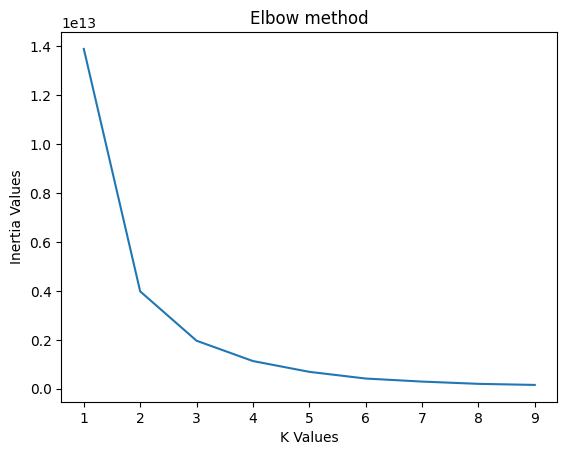

In [47]:
X = data[['Age', 'Purchase']]

inertia_values=[]
k = range(1,10)
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertia_values.append(model.inertia_)
plt.plot(k,inertia_values)
plt.title("Elbow method")
plt.xlabel("K Values")
plt.ylabel("Inertia Values")

plt.show()

In [48]:
cluster3 = KMeans(n_clusters=3)
y_predict= cluster3.fit_predict(X)
data['cluster'] = y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Age', ylabel='Purchase'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


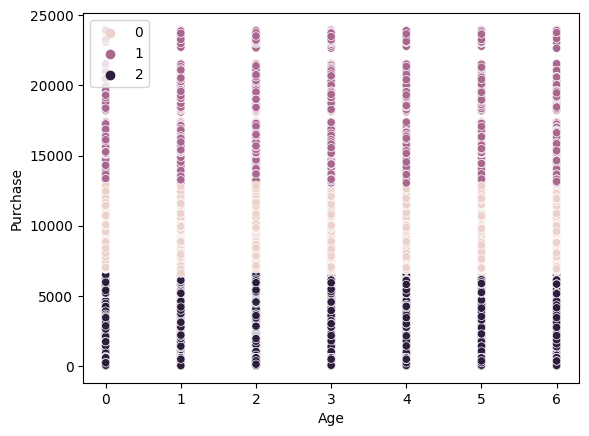

In [49]:
sns.scatterplot(data = X, x = 'Age', y = 'Purchase', hue = cluster3.labels_)

In [53]:
data1 = data[data.cluster == 1].copy()

# Convert Age back to original labels using inverse_transform
data1['Age'] = age_encoder.inverse_transform(data1['Age'])

print("Different age groups and product:")
age_product = data1.groupby('Age')['Product_ID'].agg(pd.Series.mode).to_frame()
print(age_product)

# Find the product category with the highest sales in Product_Category_1 and Product_Category_2
highest_sales_category_1 = data1.groupby('Product_Category_1')['Purchase'].sum().idxmax()
highest_sales_category_2 = data1.groupby('Product_Category_2')['Purchase'].sum().idxmax()
print("Product Category with the highest sales in Product_Category_1:", highest_sales_category_1)
print("Product Category with the highest sales in Product_Category_2:", highest_sales_category_2)

Different age groups and product:
      Product_ID
Age             
0-17   P00237542
18-25  P00110742
26-35  P00025442
36-45  P00025442
46-50  P00025442
51-55  P00025442
55+    P00080342
Product Category with the highest sales in Product_Category_1: 1
Product Category with the highest sales in Product_Category_2: 2.0
